In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt
from collections import Counter

In [2]:
uof = pd.read_csv('20201001_20210731.csv')

In [7]:
pop = pd.read_csv('co-est2019-alldata.csv', encoding="ISO-8859-1")

In [14]:
uof.head()

,form_id,County,agency_name,IncidentDate,contact_origin,location_type,incident_type,officer_injuries_medical_treatme,video_footage,officer_injuries_injured,...,PerceivedCondition,OffInjuryType,OFFMEDTREAT2,incident_date,subject_type,Officer_Name2,Officer_Name_Agency,officer_race,officer_rank,officer_gender_fill
0,21812,Ocean,Brick Twp PD,10/11/2020,Officer Dispatched,Residence,Domestic,,Yes,0,...,"Under influence of alcohol/drugs/both,Under in...",Not Provided,Not Provided,2020-10-11T01:11:35.941Z,"Person,Person",Edward Mc Caffery,Brick Twp PD-Edward Mc Caffery,Hispanic,Officer,Male
1,19016,Bergen,Paramus PD,10/13/2020,Officer Dispatched,Business,"Eluding,Theft/Shoplifting",,Yes,0,...,"No unusual condition noted,No unusual conditio...",Not Provided,Not Provided,2020-10-13T19:40:27.383Z,"Person,Person",Christopher Esposito,Paramus PD-Christopher Esposito,White,Police Officer,Male
2,19019,Bergen,Paramus PD,10/13/2020,Officer Dispatched,"Business,Other,","Eluding,Theft/Shoplifting",['Refused'],Yes,1,...,"No unusual condition noted,No unusual conditio...",Abrasion/Laceration/Puncture,Refused,2020-10-13T19:14:28.222Z,"Person,Person",Christopher Bores,Paramus PD-Christopher Bores,Other,Police Officer,Male
3,21591,Burlington,Bordentown City PD,10/21/2020,Officer Dispatched,"Police Station,Other,","Subject with other weapon,Terroristic Threats",['Refused'],Yes,1,...,"Under influence of alcohol/drugs/both,Potentia...",Abrasion/Laceration/Puncture,Refused,2020-10-21T06:15:44.347Z,"Person,Person",Daniel Anderson,Bordentown City PD-Daniel Anderson,Black,Sgt,Male
4,24356,Burlington,Bordentown Twp PD,10/21/2020,Officer Dispatched,"Police Station,Street,","Subject with other weapon,Suspicious person",,Yes,0,...,"Under influence of alcohol/drugs/both,Under in...",Not Provided,Not Provided,2020-10-21T05:13:34.758Z,"Person,Person",Joseph Ciabattoni,Bordentown Twp PD-Joseph Ciabattoni,White,Sgt,Male


In [18]:
uof.head(1).to_dict('record')

[{'form_id': 21812,
  'County': 'Ocean',
  'agency_name': 'Brick Twp PD',
  'IncidentDate': '10/11/2020',
  'contact_origin': 'Officer Dispatched',
  'location_type': 'Residence',
  'incident_type': 'Domestic',
  'officer_injuries_medical_treatme': ' ',
  'video_footage': 'Yes',
  'officer_injuries_injured': 0,
  'incident_municipality': 'Brick, Ocean County',
  'incident_case_number': '59953-20',
  'officer_in_uniform': ' ',
  'other_officer_involved': ' ',
  'indoor_or_outdoor': "['Outdoors']",
  'video_type': "['Body Worn']",
  'incident_weather': "['Clear']",
  'planned_contact': ' ',
  'incident_lighting': "['Artificial']",
  'officer_hospital_treatment': ' ',
  'report_number': 'UOF20-10-26',
  'INCIDENTID': 'Ocean-Brick Twp PD-59953-20',
  'SubjectInjuredinIncident_sum': '0',
  'SubjectInjuries': 'No Injury,No Injury,,,,',
  'SubjectInjuredprior_sum': '0',
  'TotalSubInjuredIncdient': '0',
  'SubectsArrested': 'True,True',
  'ReasonNotArrest': 'Not Provided,Not Provided',
  'Sub

In [28]:
uof[uof.incident_case_number == Counter(uof.incident_case_number).most_common(5)[0][0]].interaction_what

3696    Used arm bar on,Used arm bar on,Used take down on
3697                                            Used arms
3698                                      Used arm bar on
5470                                Other,Used arm bar on
7323                                            Used arms
7324                                      Used arm bar on
7344                                      Used arm bar on
7345                                      Used arm bar on
7346                    Used arms,Used pressure points on
7347                                            Used arms
7348                                      Used arm bar on
7349                                      Used arm bar on
7351                     Used arm bar on,Used fists/punch
7352                                      Used arm bar on
Name: interaction_what, dtype: object

(array([5.31e+03, 8.07e+02, 3.13e+02, 1.52e+02, 1.70e+01, 5.00e+00,
        5.00e+00, 1.00e+00, 1.00e+00, 3.00e+00]),
 array([ 1. ,  2.3,  3.6,  4.9,  6.2,  7.5,  8.8, 10.1, 11.4, 12.7, 14. ]),
 <a list of 10 Patch objects>)

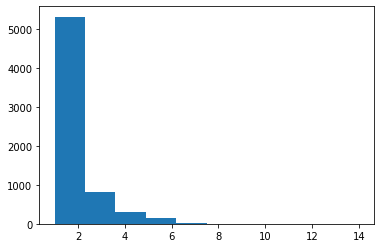

In [34]:
icn_counts = dict(Counter(uof.incident_case_number.str.lower()))
plt.hist(icn_counts.values())